<a href="https://colab.research.google.com/github/komorimasashi/Hokudai2023Resources/blob/main/GP_regression_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ガウス過程回帰

In [106]:
import numpy as np
import matplotlib.pyplot as plt

### データセットの作成

$f(x) = x \sin(x)$から20点サンプリングし観測ノイズとして正規ノイズが乗っているデータを考える

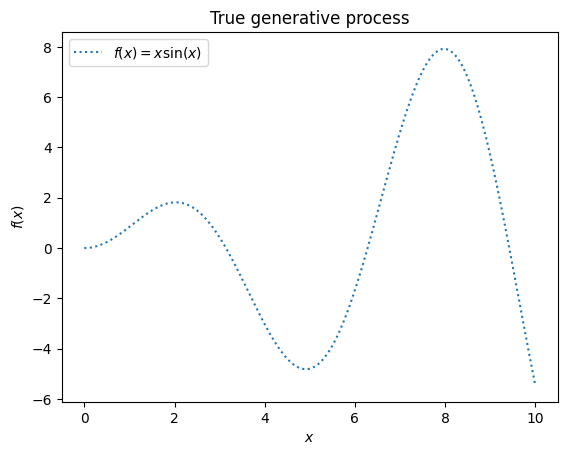

In [107]:
X = np.linspace(start=0, stop=10, num=1000).reshape(-1, 1)
y = np.squeeze(X * np.sin(X))

plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("True generative process")

In [108]:
# サンプリングする
sample_size = 10
rng = np.random.RandomState(999)
training_indices = rng.choice(np.arange(y.size), size=sample_size, replace=False)
X_train_full, y_train_full = X[training_indices], y[training_indices]

In [109]:
# 観測誤差を加える
noise_std = 1
y_train_noisy_full = y_train_full + rng.normal(loc=0.0, scale=noise_std, size=y_train_full.shape)

### 観測ノイズなし

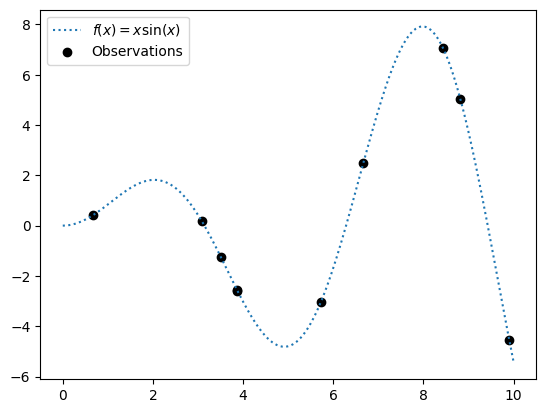

In [110]:
# 描画
X = np.linspace(start=0, stop=10, num=1000).reshape(-1, 1)
y = np.squeeze(X * np.sin(X))

plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.scatter(X_train_full, y_train_full, label="Observations",color="black")
plt.legend()

In [111]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

In [112]:
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gp_noiseless =  GaussianProcessRegressor(
    kernel=kernel, alpha=0, n_restarts_optimizer=9
)
gp_noiseless.fit(X_train_full, y_train_noisy_full)

GaussianProcessRegressor(alpha=0, kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=9)

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:445: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn(


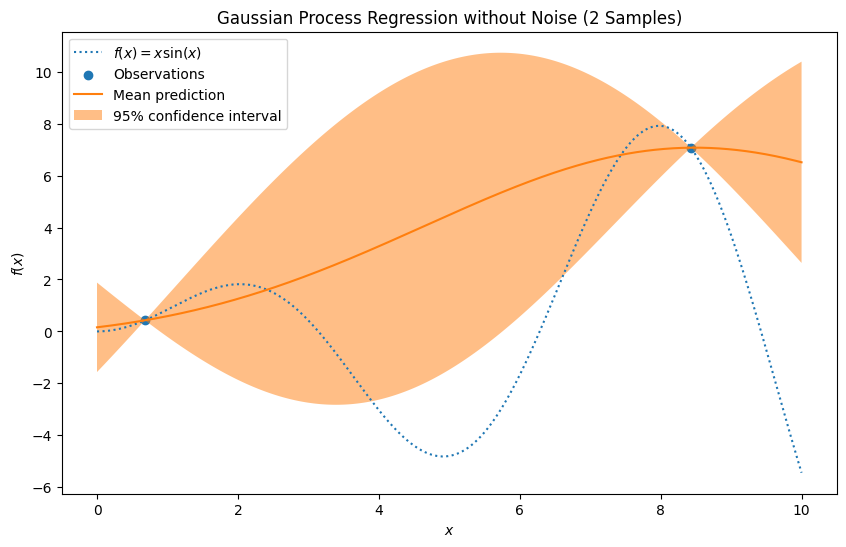

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:445: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn(


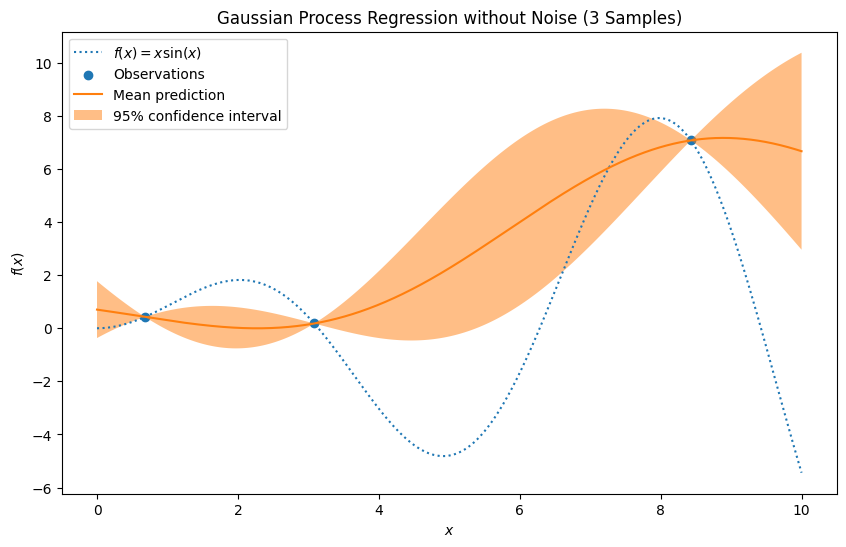

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:445: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn(


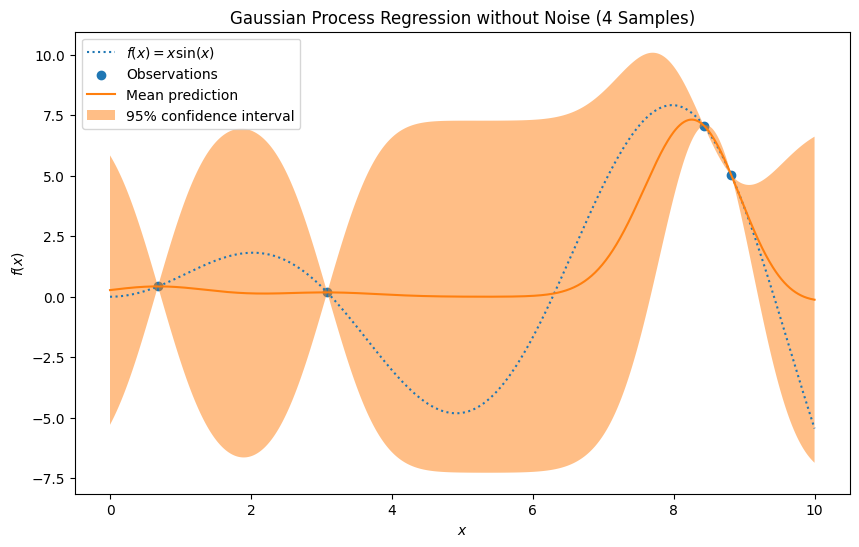

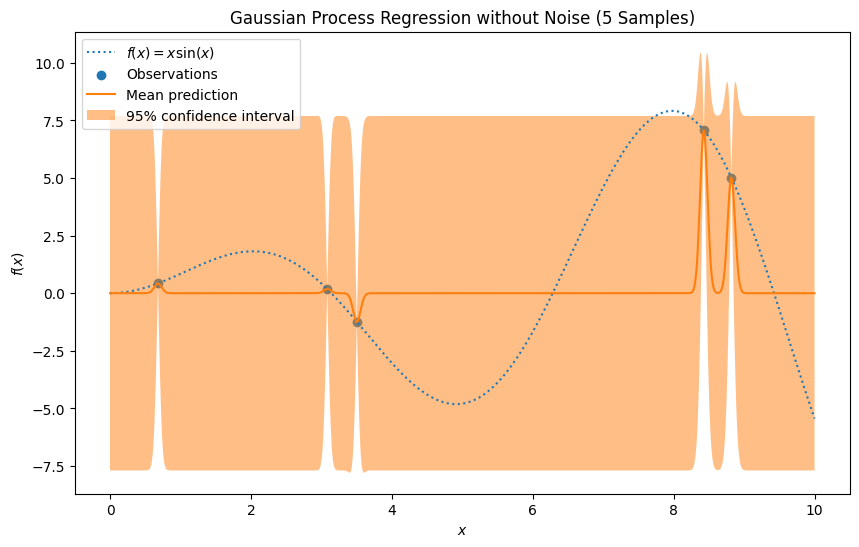

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:445: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn(


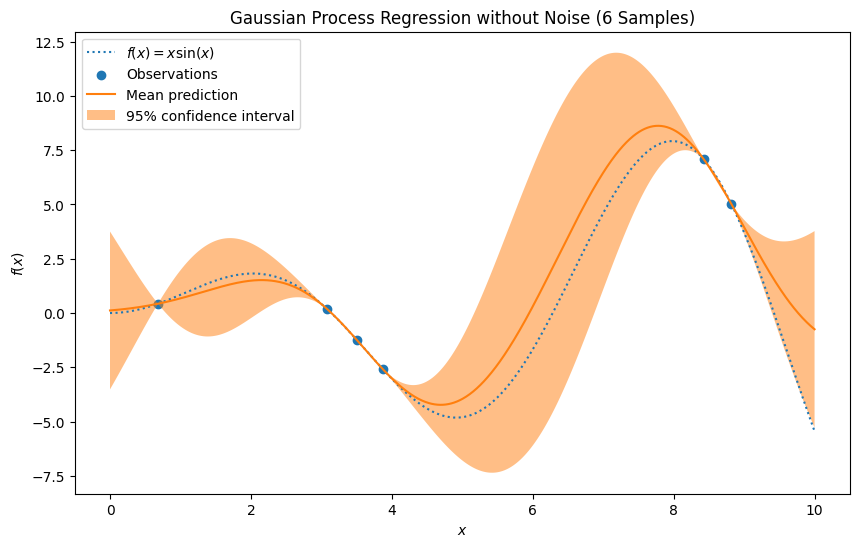

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:445: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn(


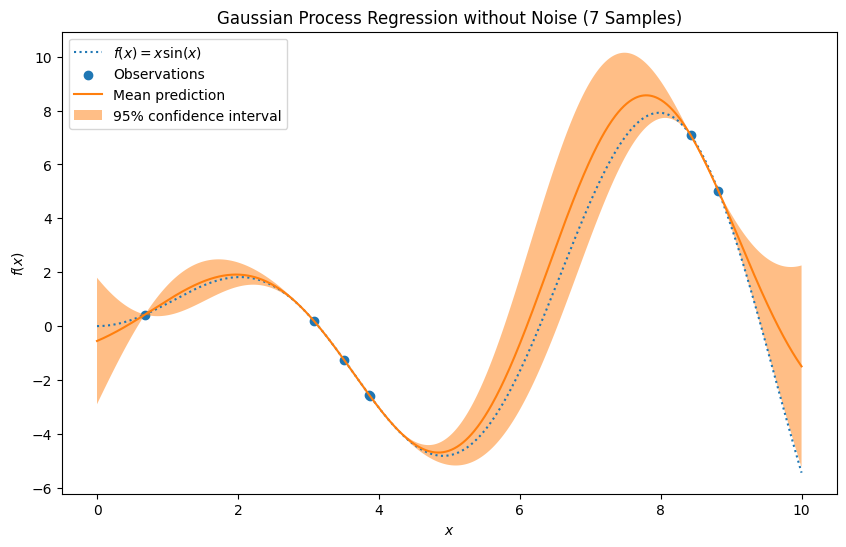

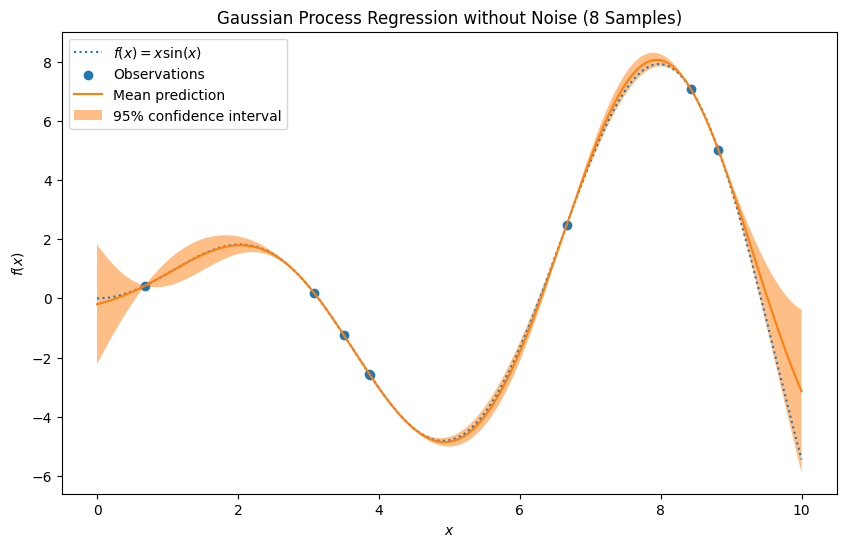

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:445: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn(


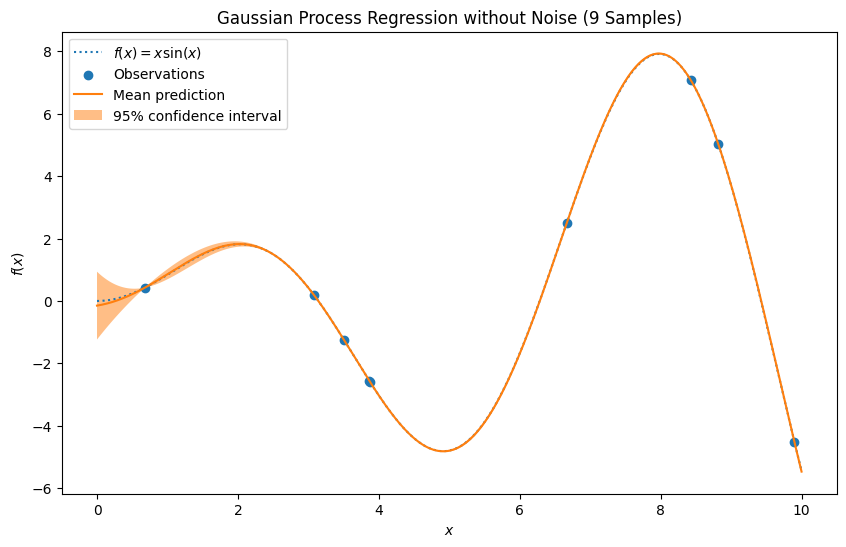

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:445: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn(


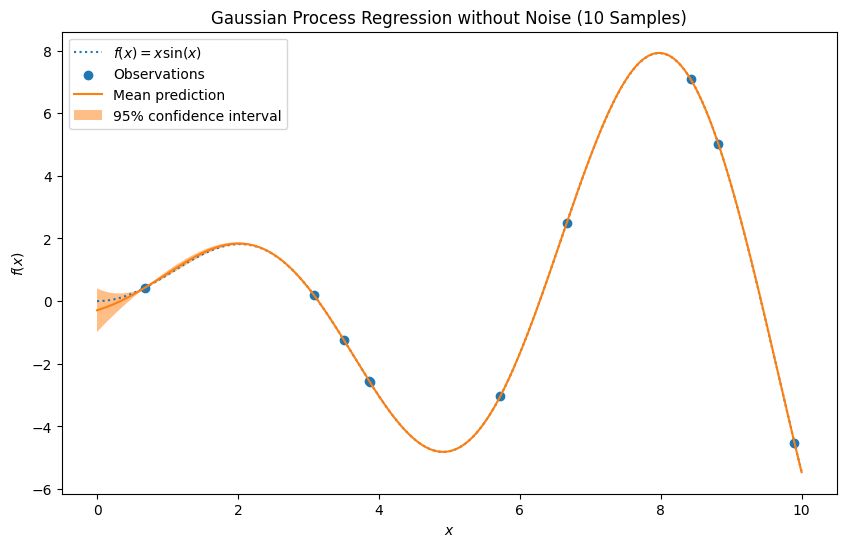

In [113]:
for sample_size in range(2, sample_size + 1):
    # 部分的なサンプリング
    X_train, y_train = X_train_full[:sample_size], y_train_full[:sample_size]

    # ガウス過程回帰モデルの生成と学習（ノイズなし）
    gp_noiseless.fit(X_train, y_train)

    # 予測値とその標準偏差を求める
    y_pred, sigma = gp_noiseless.predict(X, return_std=True)

    # 結果を描画
    plt.figure(figsize=(10, 6))
    plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
    plt.scatter(X_train, y_train, label="Observations")
    plt.plot(X, y_pred, label="Mean prediction")
    plt.fill_between(X.ravel(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.5, label=r"95% confidence interval")
    plt.legend()
    plt.xlabel("$x$")
    plt.ylabel("$f(x)$")
    plt.title(f"Gaussian Process Regression without Noise ({sample_size} Samples)")
    plt.show()


### Matternカーネル

In [114]:
from sklearn.gaussian_process.kernels import Matern

In [115]:
kernel = 1 * 1.0 * Matern(length_scale=1.0, nu=1.5)
gp_matern =  GaussianProcessRegressor(
    kernel=kernel, alpha=noise_std**2, n_restarts_optimizer=9
)
gp_matern.fit(X_train_full, y_train_full)

GaussianProcessRegressor(alpha=1, kernel=1**2 * Matern(length_scale=1, nu=1.5),
                         n_restarts_optimizer=9)

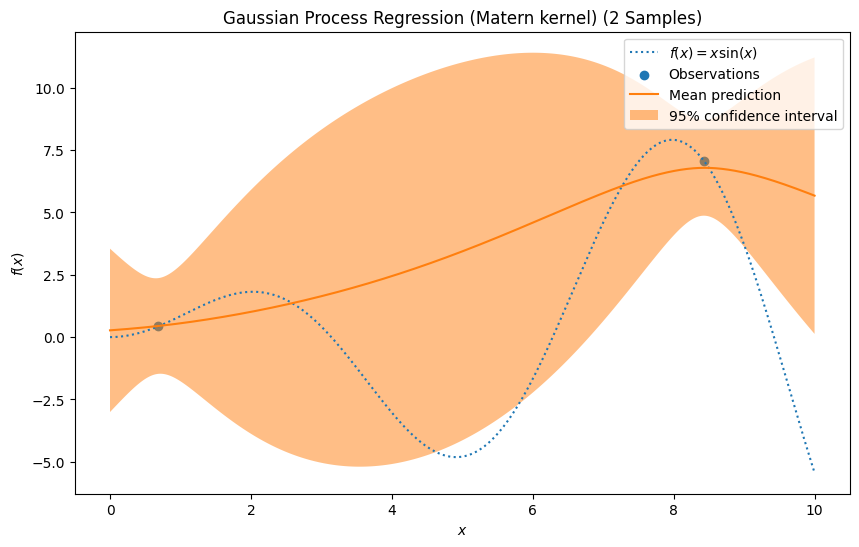

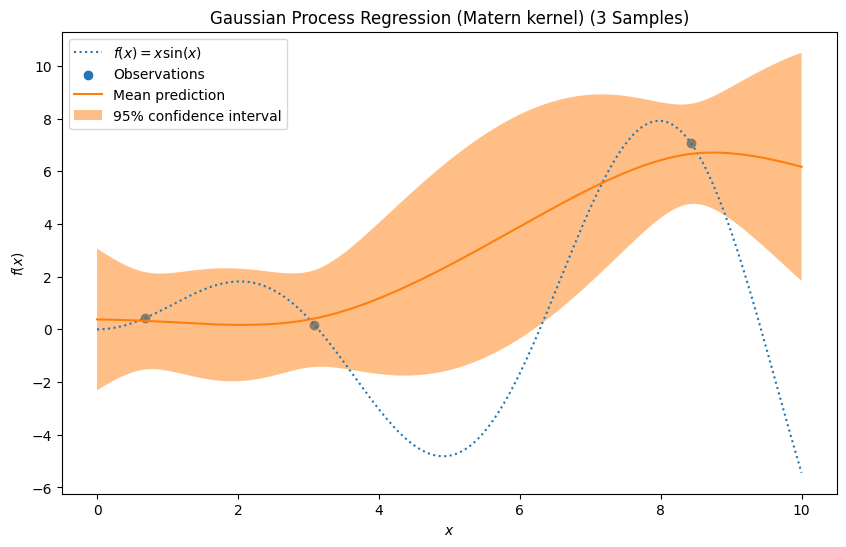

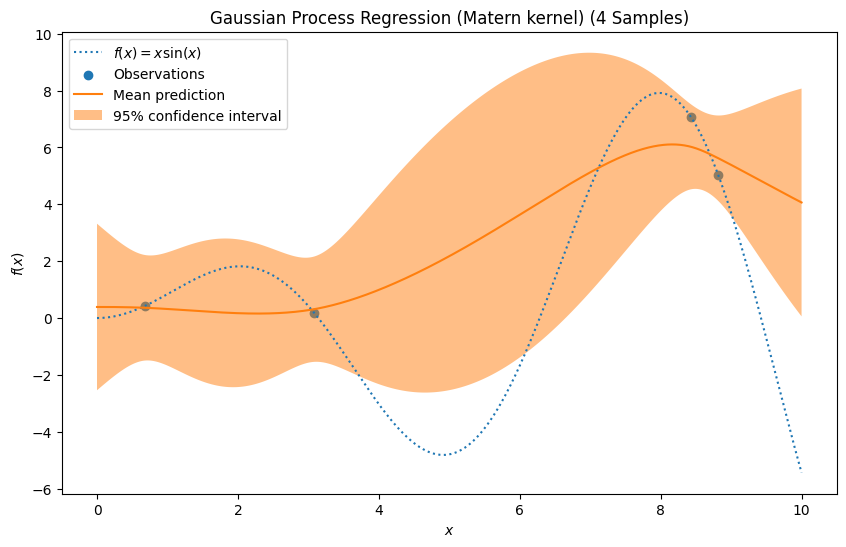

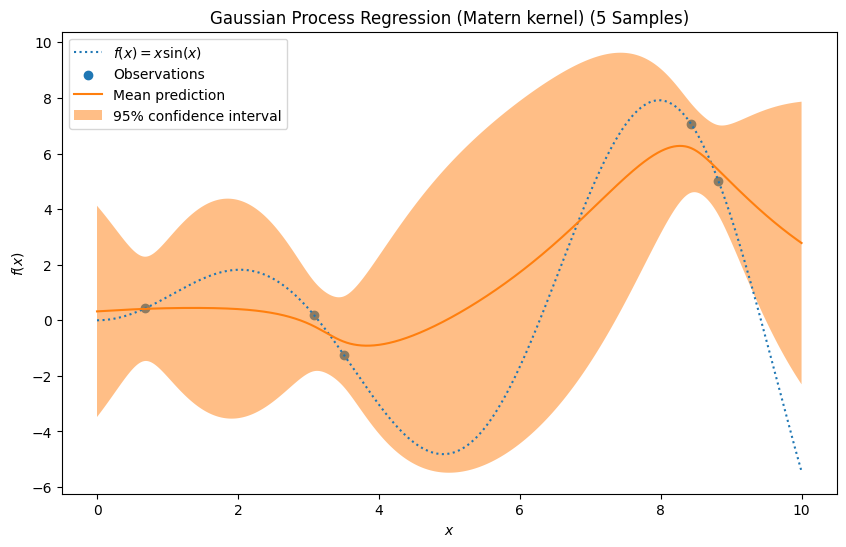

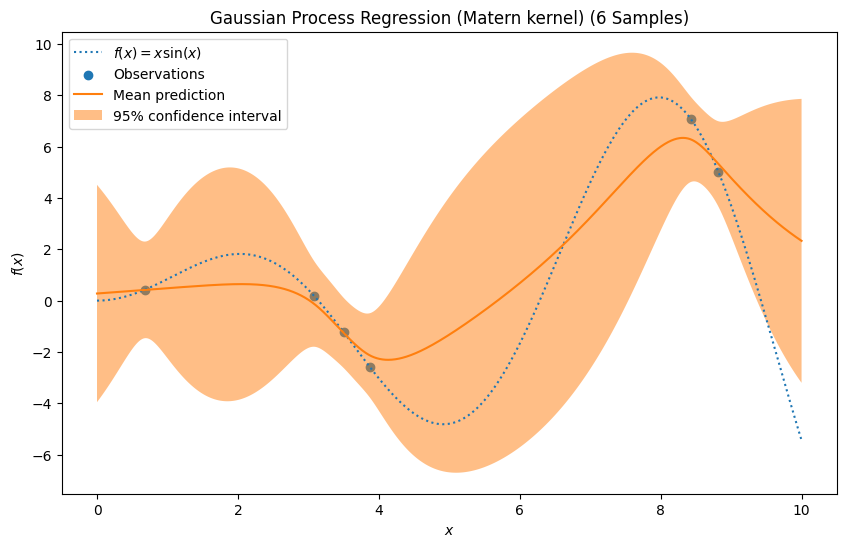

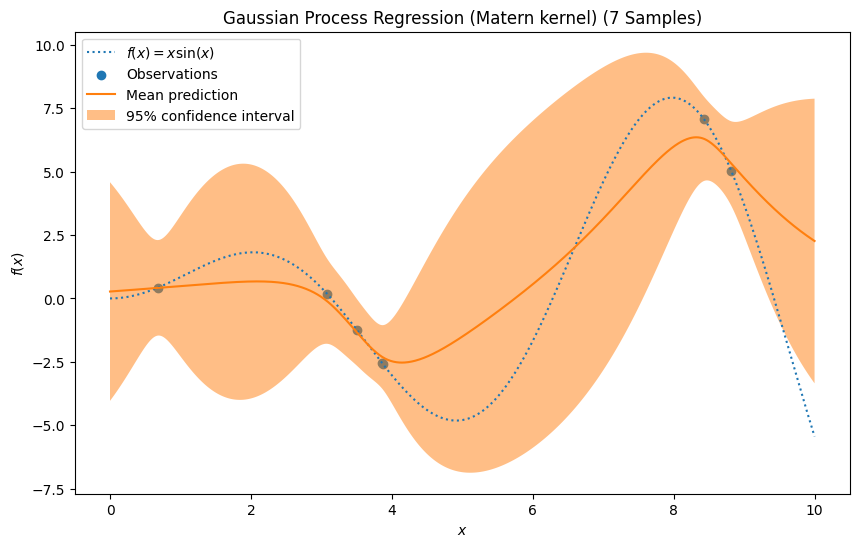

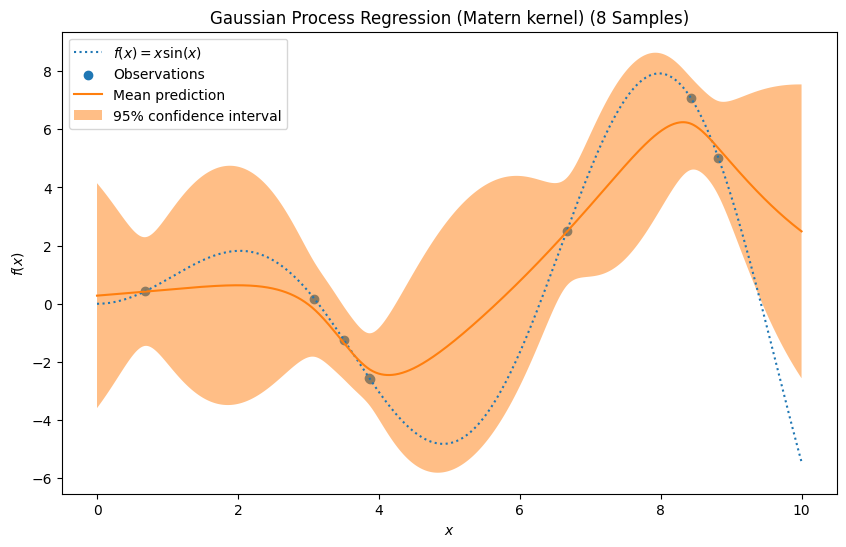

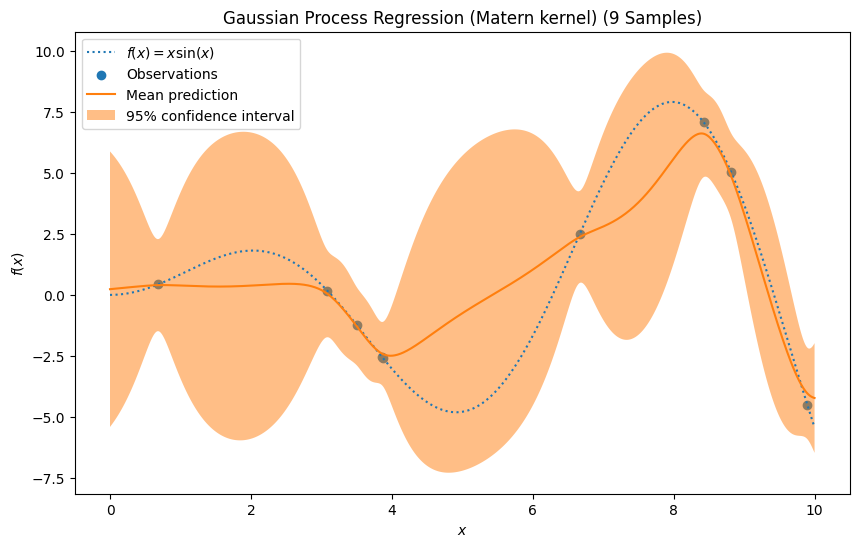

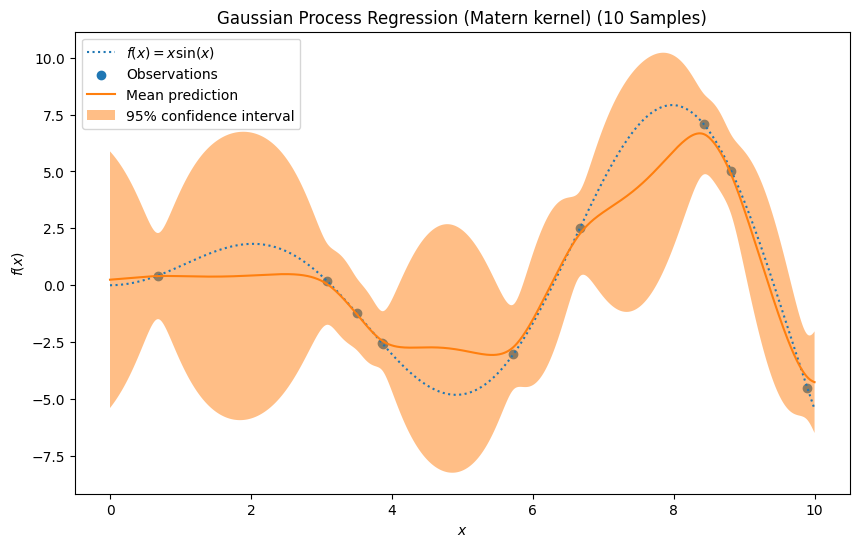

In [116]:
for sample_size in range(2, sample_size + 1):
    # 部分的なサンプリング
    X_train, y_train = X_train_full[:sample_size], y_train_full[:sample_size]

    # ガウス過程回帰モデルの生成と学習（Maternカーネル）
    gp_matern.fit(X_train, y_train)

    # 予測値とその標準偏差を求める
    y_pred, sigma = gp_matern.predict(X, return_std=True)

    # 結果を描画
    plt.figure(figsize=(10, 6))
    plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
    plt.scatter(X_train, y_train, label="Observations")
    plt.plot(X, y_pred, label="Mean prediction")
    plt.fill_between(X.ravel(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.5, label=r"95% confidence interval")
    plt.legend()
    plt.xlabel("$x$")
    plt.ylabel("$f(x)$")
    plt.title(f"Gaussian Process Regression (Matern kernel) ({sample_size} Samples)")
    plt.show()


### 観測ノイズあり

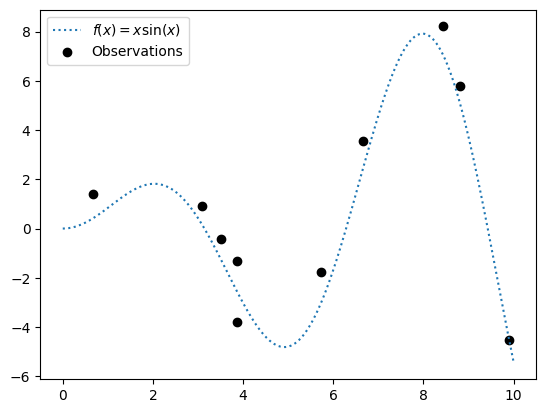

In [117]:
# 描画
X = np.linspace(start=0, stop=10, num=1000).reshape(-1, 1)
y = np.squeeze(X * np.sin(X))

plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.scatter(X_train_full, y_train_noisy_full, label="Observations",color="black")
plt.legend()

In [118]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

In [119]:
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gp_noisy =  GaussianProcessRegressor(
    kernel=kernel, alpha=noise_std**2, n_restarts_optimizer=9
)
gp_noisy.fit(X_train_full, y_train_noisy_full)

GaussianProcessRegressor(alpha=1, kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=9)

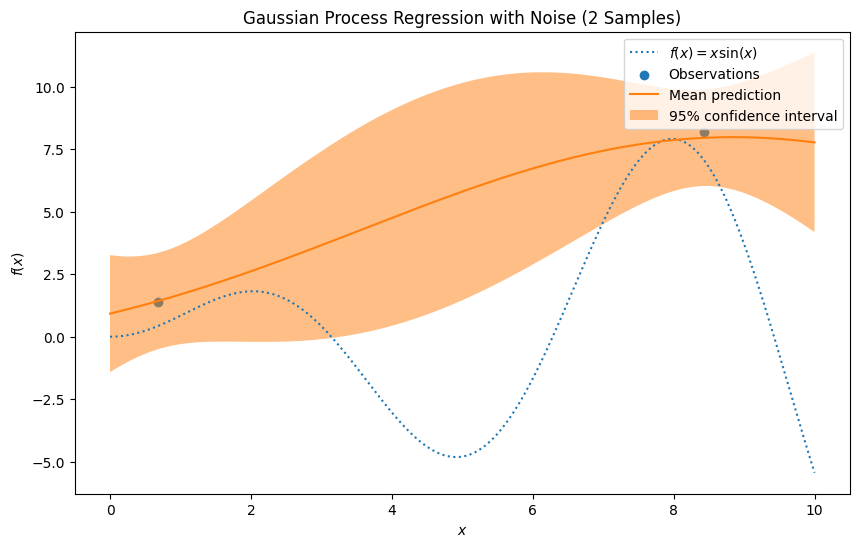

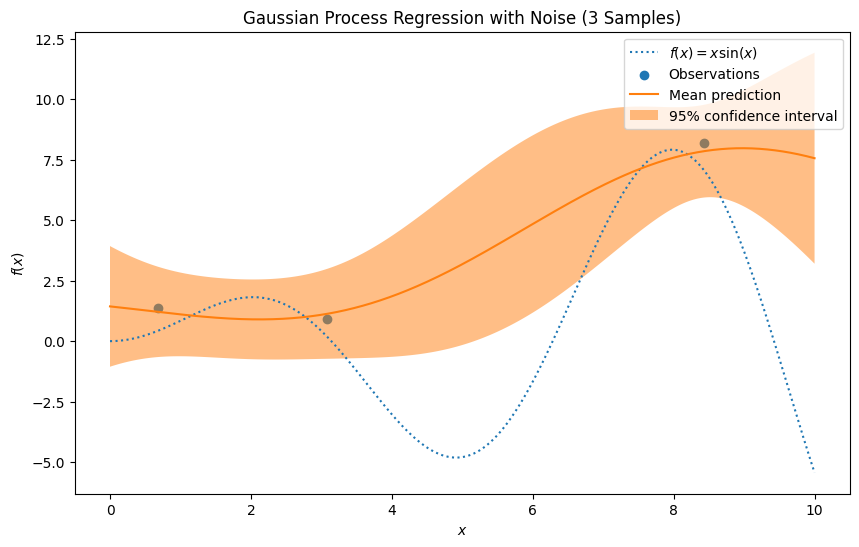

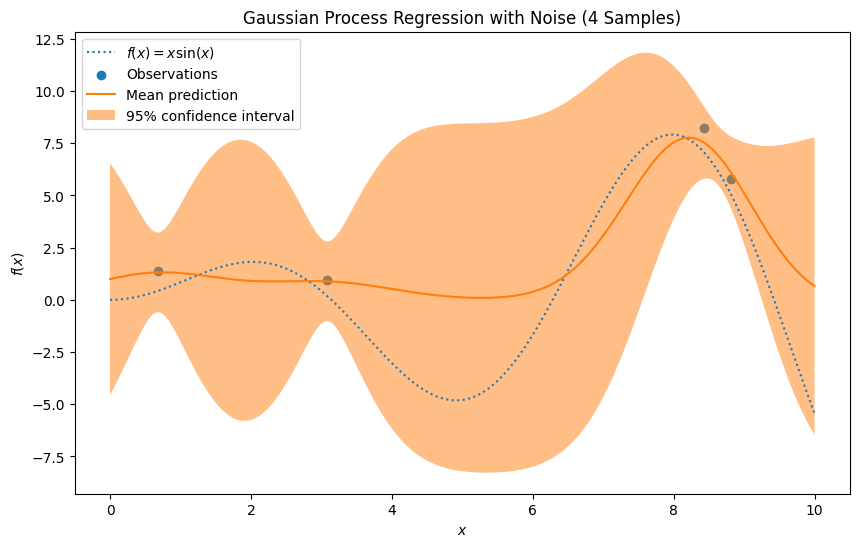

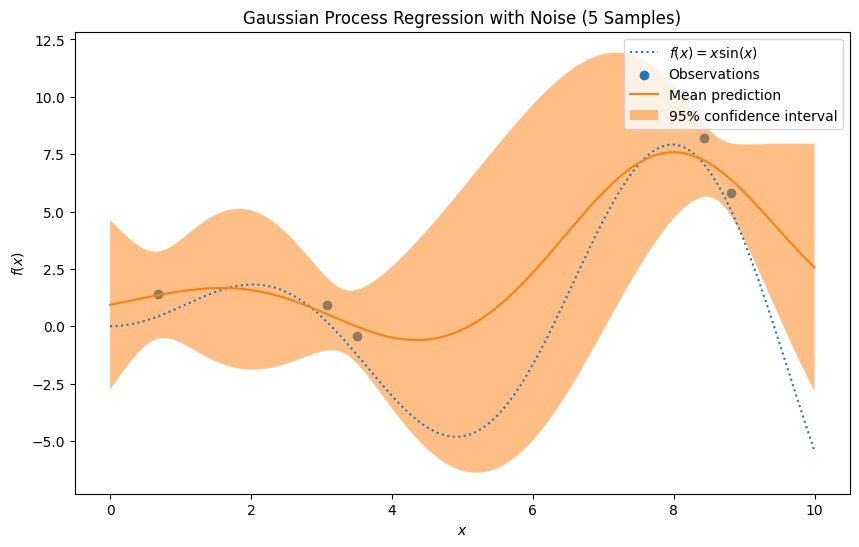

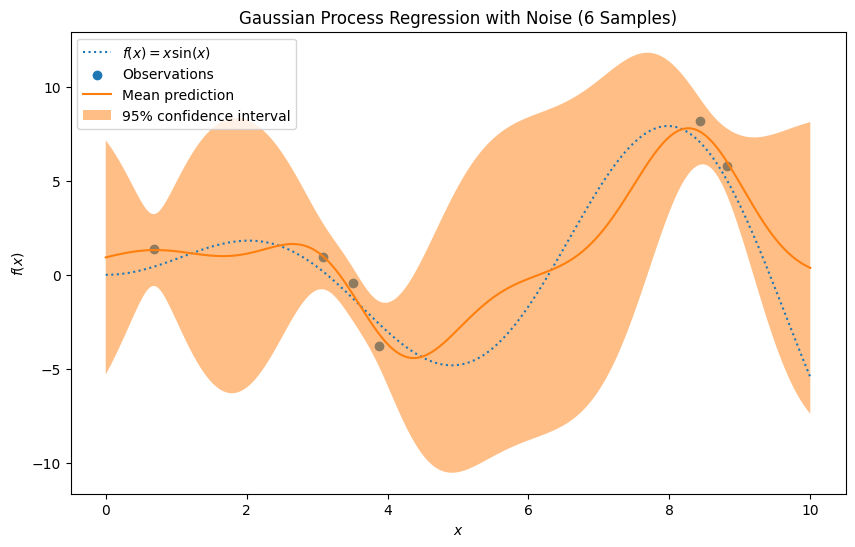

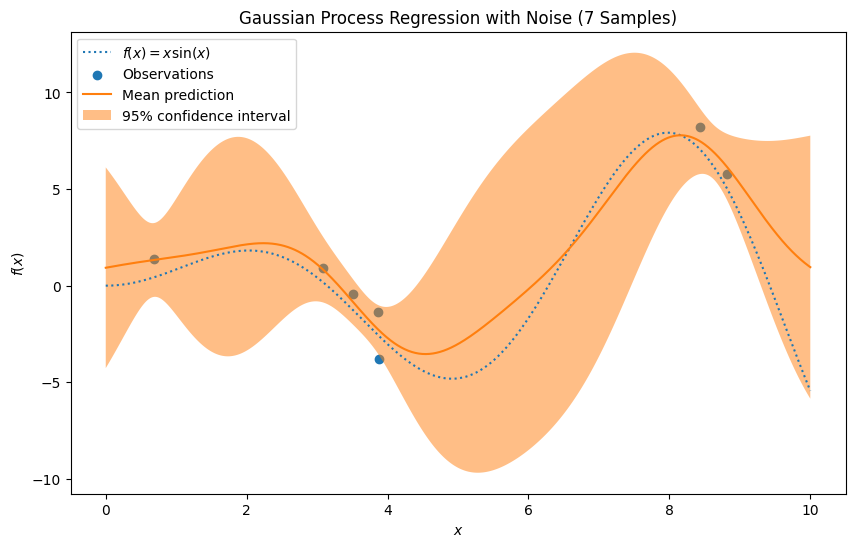

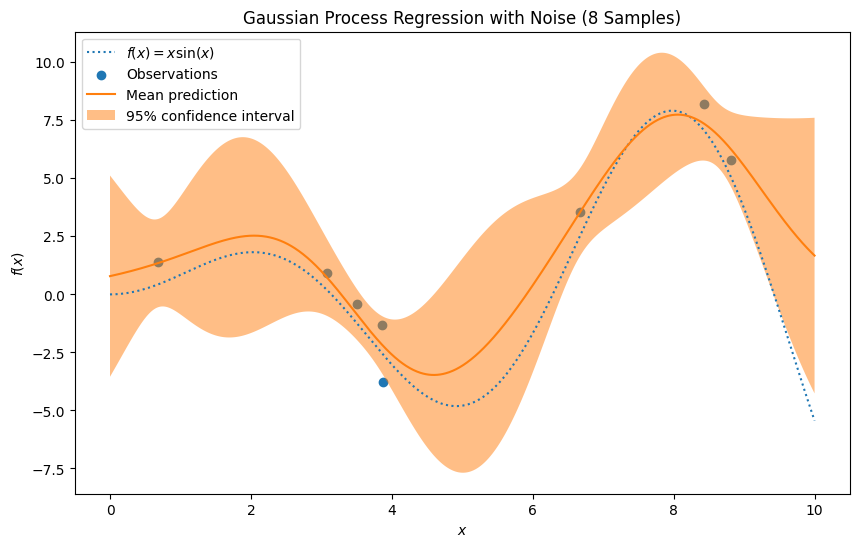

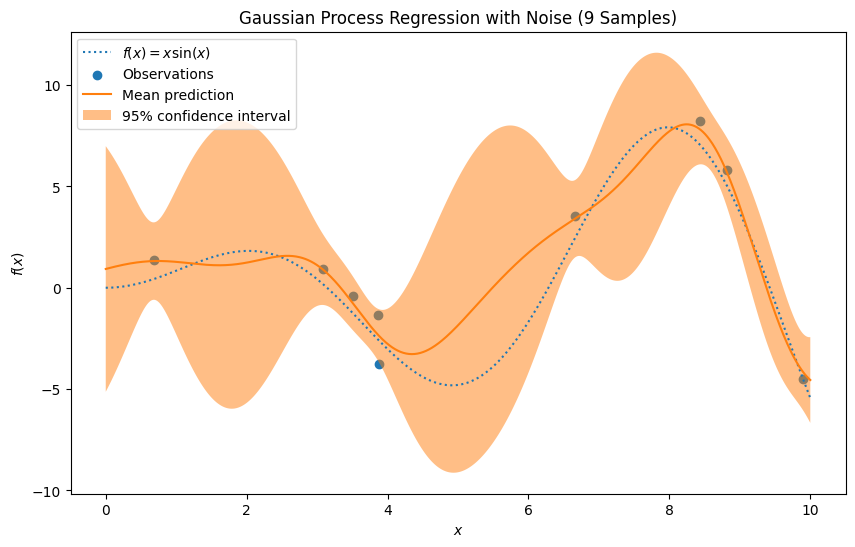

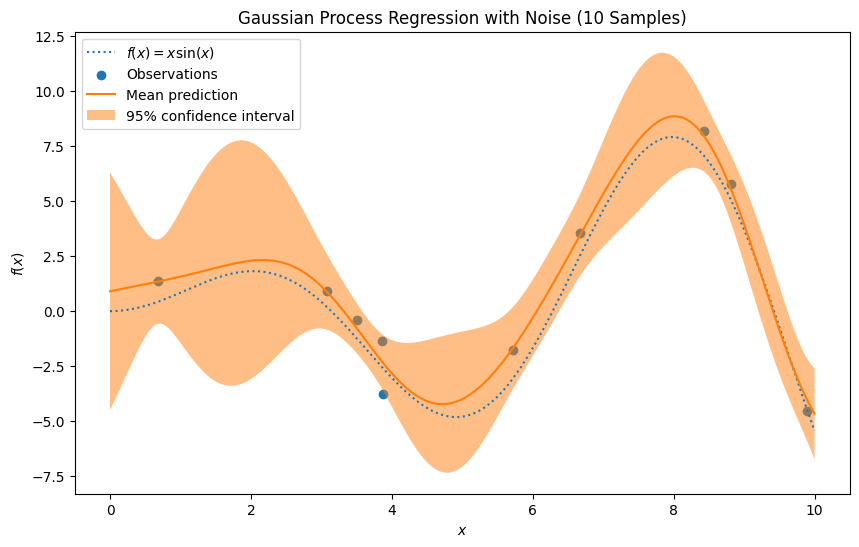

In [120]:
for sample_size in range(2, sample_size + 1):
    # 部分的なサンプリング
    X_train, y_train_noisy = X_train_full[:sample_size], y_train_noisy_full[:sample_size]

    # ガウス過程回帰モデルの生成と学習（ノイズなし）
    gp_noisy.fit(X_train, y_train_noisy)

    # 予測値とその標準偏差を求める
    y_pred, sigma = gp_noisy.predict(X, return_std=True)

    # 結果を描画
    plt.figure(figsize=(10, 6))
    plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
    plt.scatter(X_train, y_train_noisy, label="Observations")
    plt.plot(X, y_pred, label="Mean prediction")
    plt.fill_between(X.ravel(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.5, label=r"95% confidence interval")
    plt.legend()
    plt.xlabel("$x$")
    plt.ylabel("$f(x)$")
    plt.title(f"Gaussian Process Regression with Noise ({sample_size} Samples)")
    plt.show()


## 獲得関数を用いたベイズ最適化

### UCB戦略

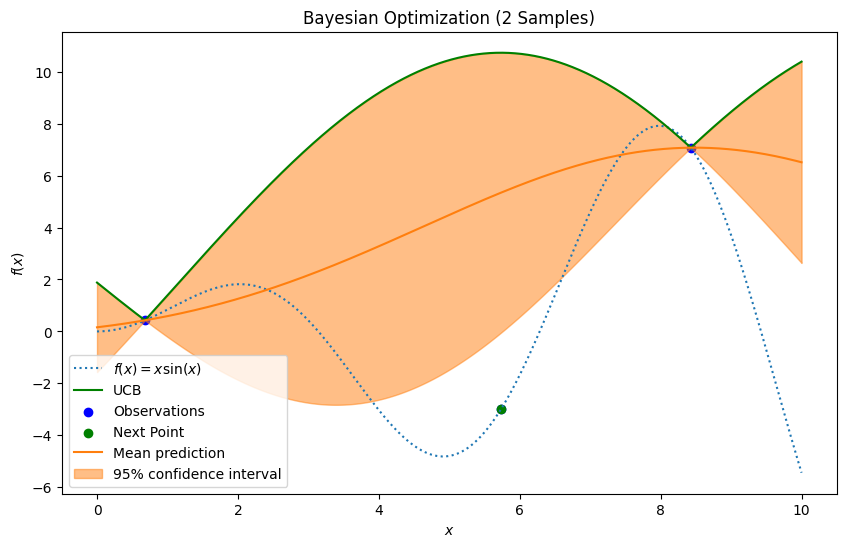

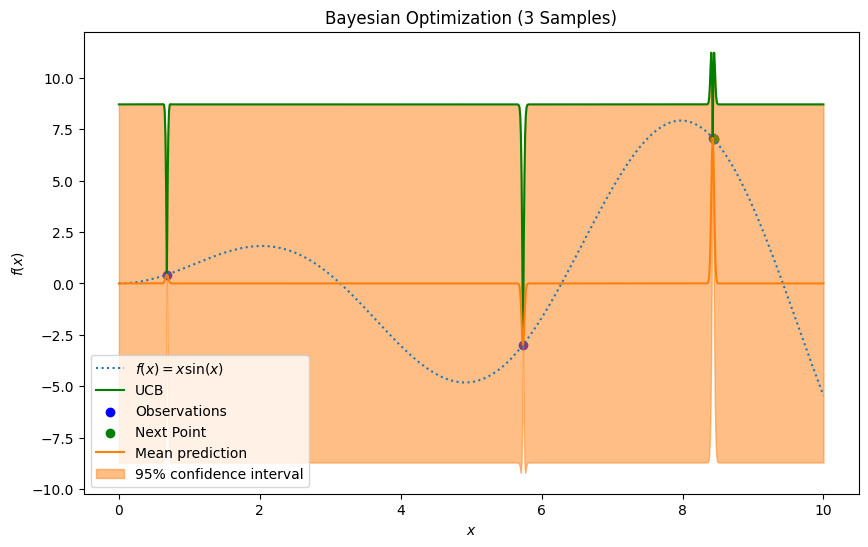

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:445: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn(


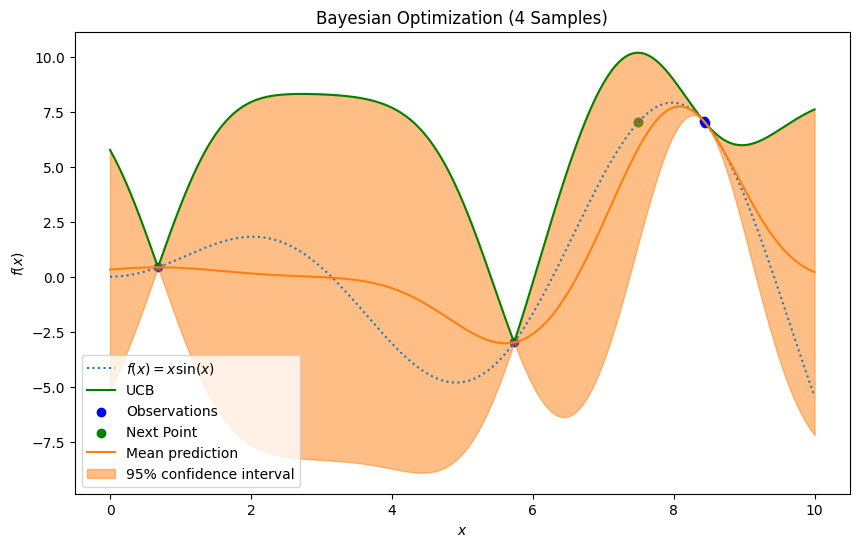

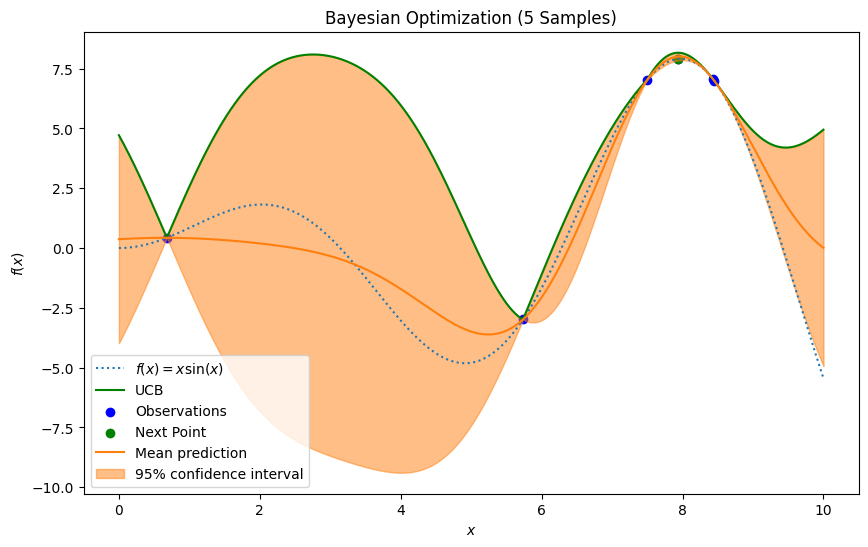

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:445: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn(


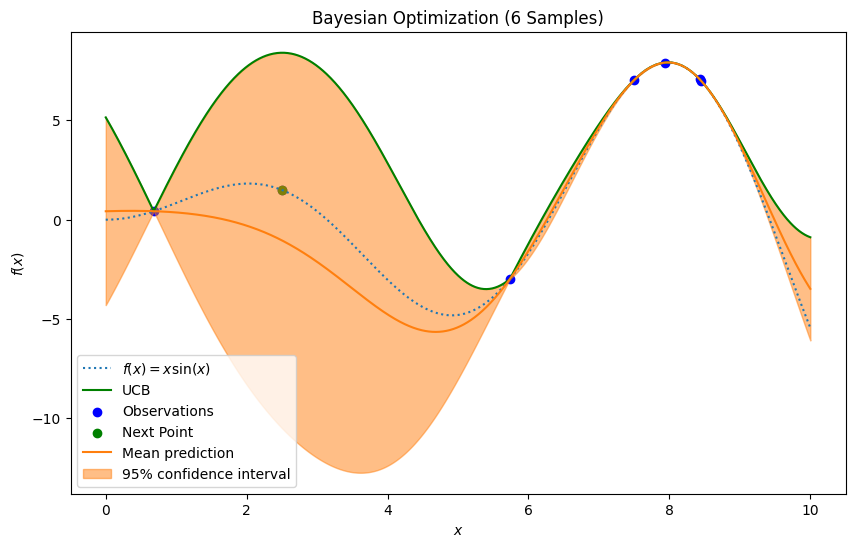

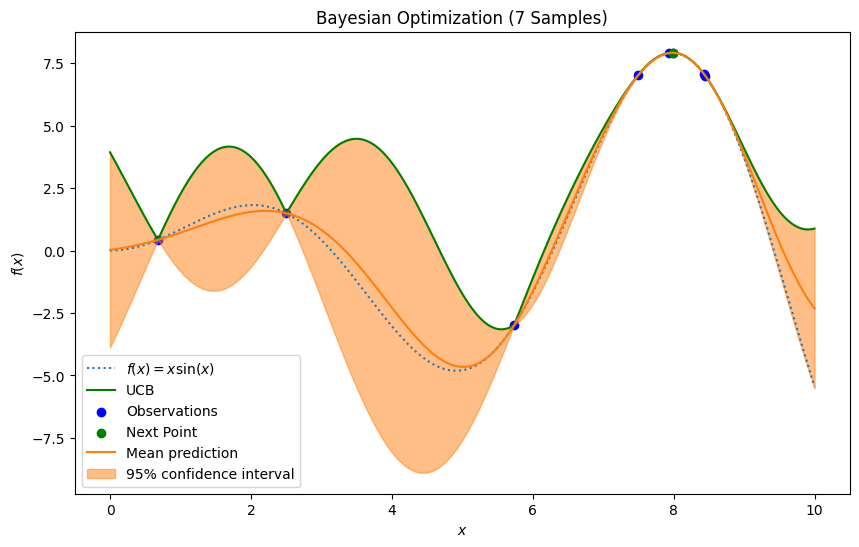

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:445: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn(


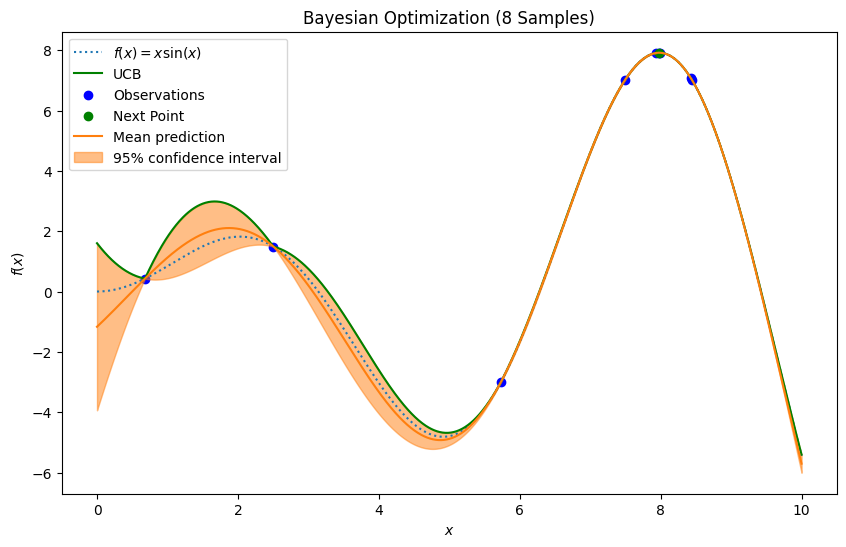

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:445: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn(


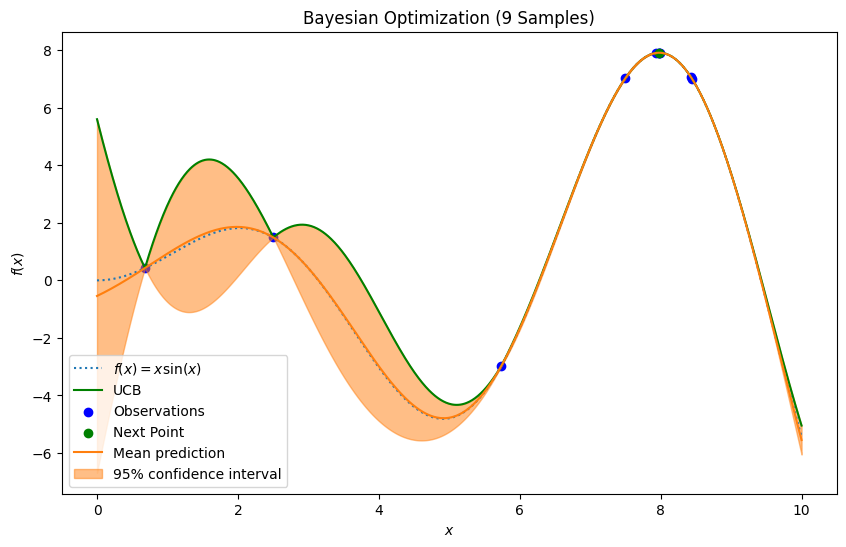

In [121]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# 関数の定義（最適化する関数）
def f(x):
    return x * np.sin(x)

# 初期サンプリングする
sample_size = 2
rng = np.random.RandomState(999)
training_indices = rng.choice(np.arange(y.size), size=sample_size, replace=False)
X = np.linspace(start=0, stop=10, num=1000).reshape(-1, 1)
X_train, y_train = X[training_indices], y[training_indices]


# ガウス過程回帰モデルの初期化
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gp_noiseless =  GaussianProcessRegressor(
    kernel=kernel, alpha=0, n_restarts_optimizer=9
)

gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)


# ベイズ最適化の実行
n_iter = 8
for i in range(n_iter):
    # モデルの学習
    gp_noiseless.fit(X_train, y_train)

    # 探索空間（ここでは0から10まで）
    x = np.atleast_2d(np.linspace(0, 10, 1000)).T

    # 予測と不確実性（標準偏差）
    y_pred, sigma = gp_noiseless.predict(x, return_std=True)

    # UCB獲得関数の計算
    kappa = 1.96  # 探索と活用のバランスを調整するパラメータ
    ucb = y_pred + kappa * sigma

    # 最大UCBを持つ点を選択
    x_next = x[np.argmax(ucb)]

    # 新しい点での関数の値を評価
    y_next = f(x_next)

    # データセットに追加
    X_train = np.vstack((X_train, x_next))
    y_train = np.append(y_train, y_next)

    # 結果のプロット
    plt.figure(figsize=(10, 6))
    plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
    plt.plot(x, ucb, label="UCB", color="green")
    plt.scatter(X_train, y_train, label="Observations", color="blue")
    plt.scatter(x_next, y_next, label="Next Point", color="green")
    plt.plot(X, y_pred, label="Mean prediction")
    plt.fill_between(X.ravel(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.5, color="tab:orange", label=r"95% confidence interval")
    plt.legend()
    plt.xlabel("$x$")
    plt.ylabel("$f(x)$")
    plt.title(f"Bayesian Optimization ({sample_size+i} Samples)")
    plt.show()



### Expexted Improvement戦略

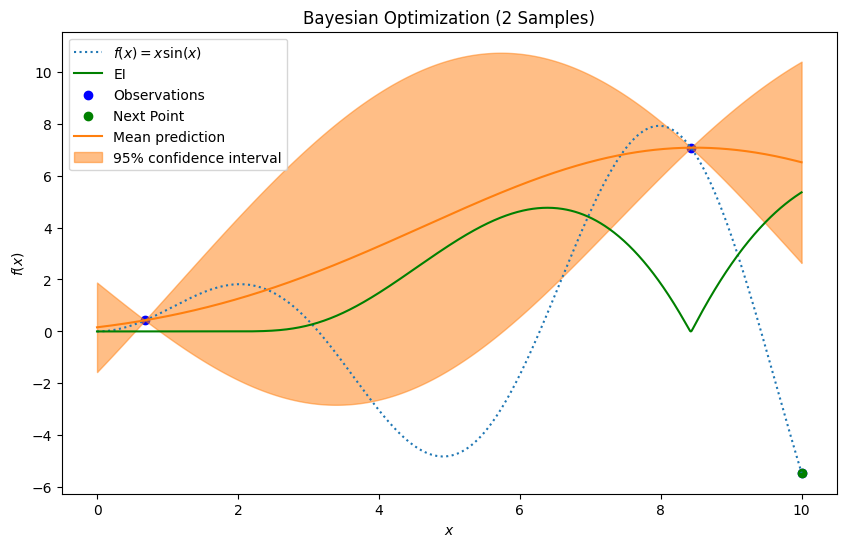

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


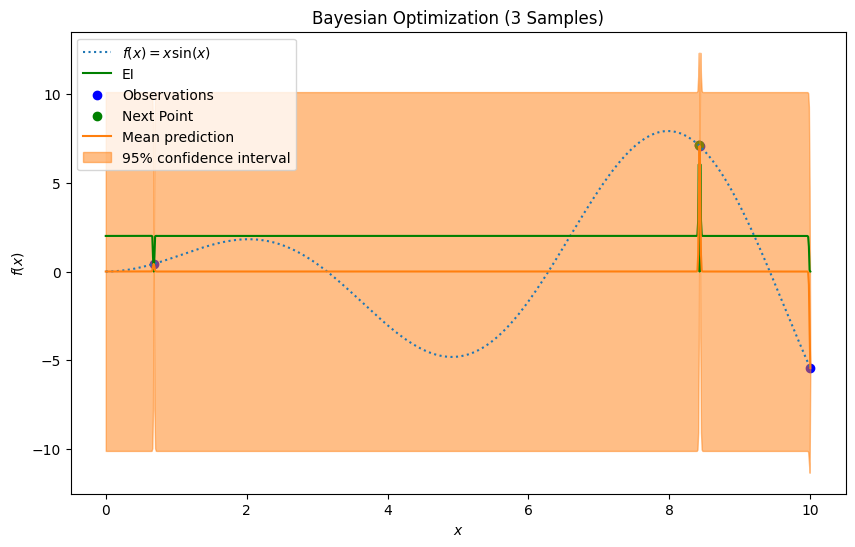

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:445: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:445: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn(
<ipython-input-122-ac68b2bd9d94>:35: RuntimeWarning: divide by zero encountered in divide
  Z = imp / sigma


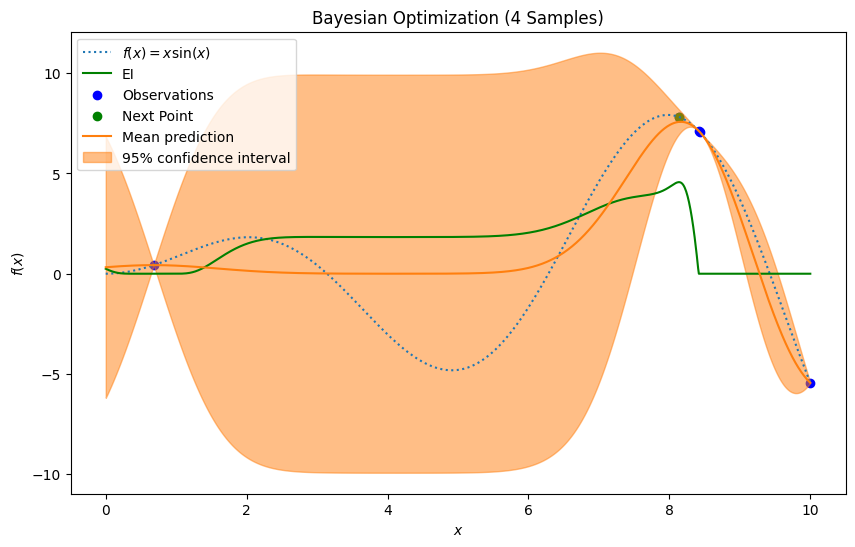

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:445: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:445: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn(
<ipython-input-122-ac68b2bd9d94>:35: RuntimeWarning: divide by zero encountered in divide
  Z = imp / sigma


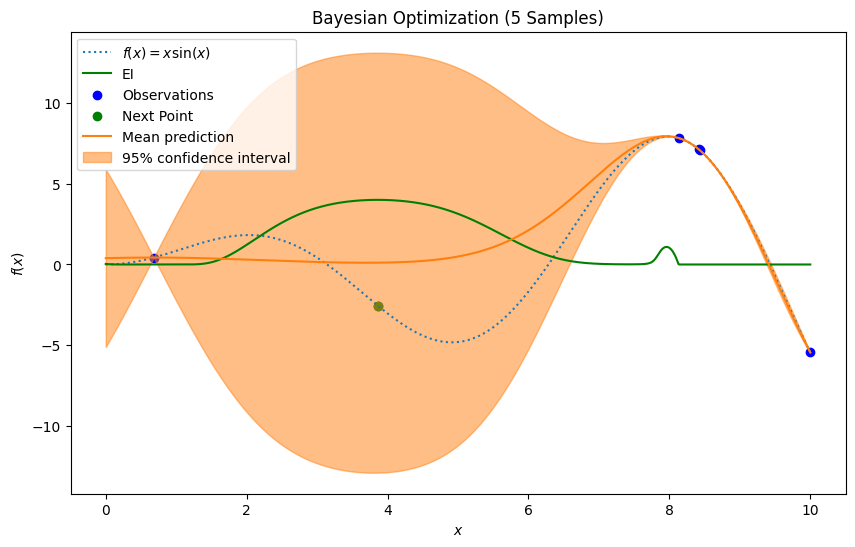

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:445: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:445: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn(
<ipython-input-122-ac68b2bd9d94>:35: RuntimeWarning: divide by zero encountered in divide
  Z = imp / sigma


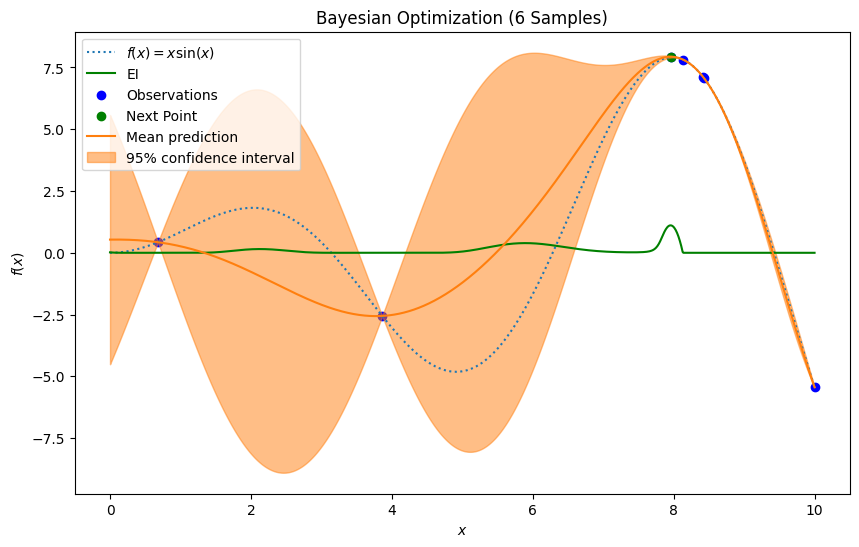

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:445: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:445: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn(
<ipython-input-122-ac68b2bd9d94>:35: RuntimeWarning: divide by zero encountered in divide
  Z = imp / sigma


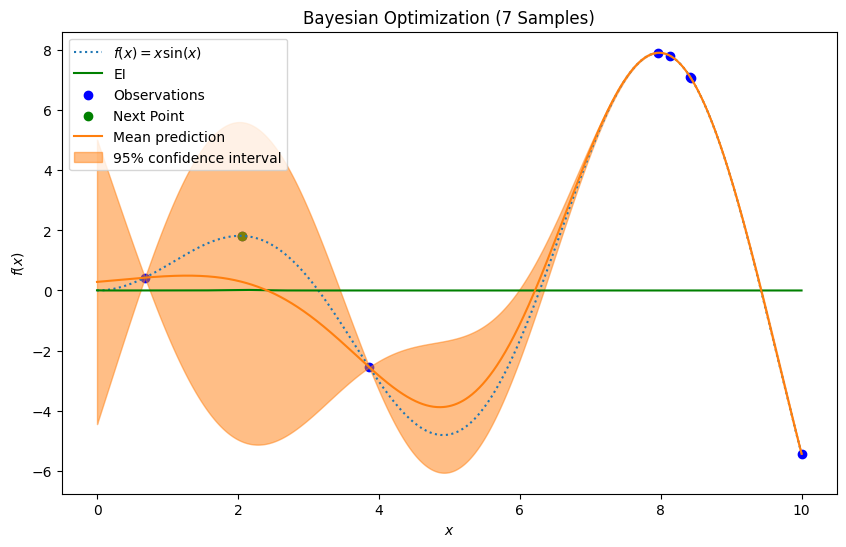

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:445: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:445: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn(
<ipython-input-122-ac68b2bd9d94>:35: RuntimeWarning: divide by zero encountered in divide
  Z = imp / sigma


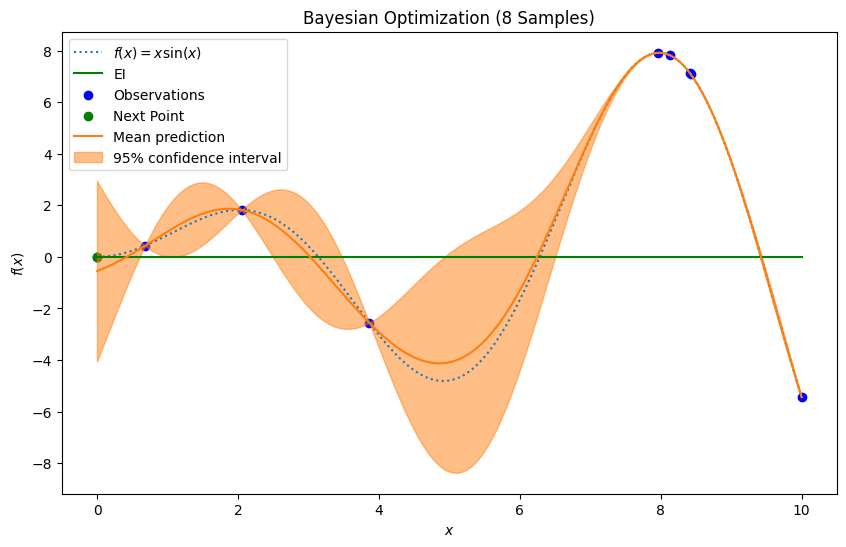

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:445: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:445: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn(
<ipython-input-122-ac68b2bd9d94>:35: RuntimeWarning: divide by zero encountered in divide
  Z = imp / sigma


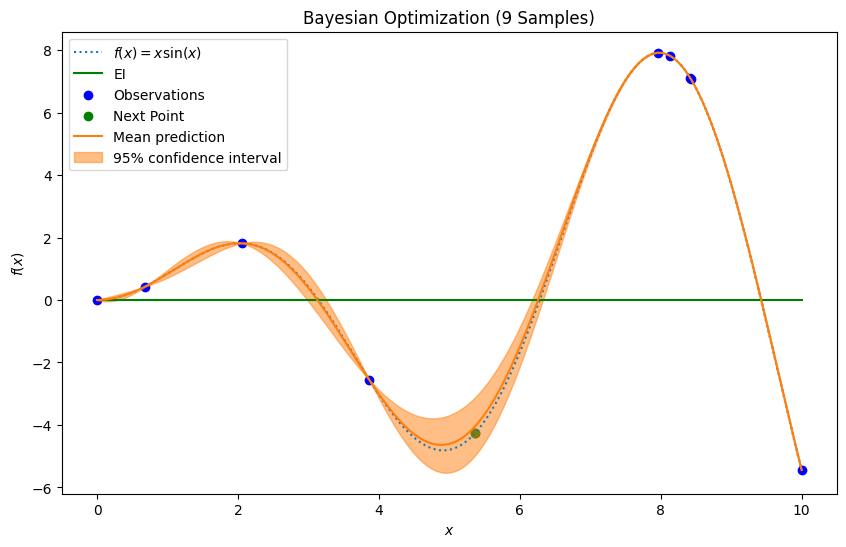

In [122]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# 関数の定義（最適化する関数）
def f(x):
    return x * np.sin(x)

# 初期サンプリングする
sample_size = 2
rng = np.random.RandomState(999)
training_indices = rng.choice(np.arange(y.size), size=sample_size, replace=False)
X = np.linspace(start=0, stop=10, num=1000).reshape(-1, 1)
X_train, y_train = X[training_indices], y[training_indices]


# ガウス過程回帰モデルの初期化
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gp_noiseless =  GaussianProcessRegressor(
    kernel=kernel, alpha=0, n_restarts_optimizer=9
)


def expected_improvement(X, X_sample, Y_sample, gp, xi=0.01):
    mu, sigma = gp.predict(X, return_std=True)

    # 最良の観測値を見つける
    mu_sample_opt = np.max(Y_sample)

    # EIの計算
    with np.errstate(divide='warn'):
        imp = mu - mu_sample_opt - xi
        Z = imp / sigma
        ei = imp * norm.cdf(Z) + sigma * norm.pdf(Z)
        ei[sigma == 0.0] = 0.0

    return ei.ravel()


# ベイズ最適化の実行
n_iter = 8
for i in range(n_iter):
    # モデルの学習
    gp_noiseless.fit(X_train, y_train)

    # 探索空間（ここでは0から10まで）
    x = np.atleast_2d(np.linspace(0, 10, 1000)).T

    # 予測と不確実性（標準偏差）
    y_pred, sigma = gp_noiseless.predict(x, return_std=True)

    # EI獲得関数の計算
    ei = expected_improvement(x, X_train, y_train, gp_noiseless)

    # 最大EIを持つ点を選択
    x_next = x[np.argmax(ei)]

    # 新しい点での関数の値を評価
    y_next = f(x_next)

    # データセットに追加
    X_train = np.vstack((X_train, x_next))
    y_train = np.append(y_train, y_next)

    # 結果のプロット
    plt.figure(figsize=(10, 6))
    plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
    plt.plot(x, ei*10, label="EI", color="green")
    plt.scatter(X_train, y_train, label="Observations", color="blue")
    plt.scatter(x_next, y_next, label="Next Point", color="green")
    plt.plot(X, y_pred, label="Mean prediction")
    plt.fill_between(X.ravel(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.5, color="tab:orange", label=r"95% confidence interval")
    plt.legend()
    plt.xlabel("$x$")
    plt.ylabel("$f(x)$")
    plt.title(f"Bayesian Optimization ({sample_size+i} Samples)")
    plt.show()